In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import json # Lavorare con file json
from pathlib import Path # Per identificare il path del file 'config'

# Identificare il file config.json 
start = Path.cwd()
current = start.resolve()
for parent in [current] + list(current.parents):
   json_path_config_path = parent / "config.json"
   if json_path_config_path.exists():
      break 

with open(json_path_config_path) as f:
   paths = json.load(f)

path_dati = f'{paths["path_progetto"]}{paths["path_results"]}'

# Analisi match

In [2]:
titolo = pd.read_csv(f"{path_dati}/matches_titolo_095.csv",index_col=0)
print(titolo.shape)
titolo_città = pd.read_csv(f"{path_dati}/matches_titolo_095_città_08.csv")
print(titolo_città.shape)

(275, 24)
(275, 26)


Hanno lo stesso numero di match, controllare che siano gli stessi. Si può controllare che i match siano gli stessi tramite la variabile **pair**.   

Per controllare si trasformano i oggetti **set** tutte le coppie di pair per ogni dataset. 
Successivamente si fa l'intersezione di questi due insiemi, se l'intersezione è pari al numero di elementi significa che gli elementi tutti uguali. 

In [3]:
coppie_titolo_città=set(titolo_città.pair)
coppie_titolo= set(titolo.pair)

In [4]:
len(coppie_titolo_città.intersection(coppie_titolo))

275

Il numero di elementi nell'intersezione è pari al numero di elementi perciò i match sono gli stessi per entrambi i dataset.      
Dato questo si procederà con i match basati solo sul titolo.

In [5]:
df = titolo # Per assegnare al dataframe titolo la variabile df, più facile da richiamare
            # non essendo assegnazione tramite copy le due variabili ora codificano per lo stesso dataframe

# Statistiche descrittive

## Differenze di prezzo (Booking - Agoda)

### Differenze di prezzo (Booking - Agoda)

In [6]:
# Calcolo differenza di prezzo assoluta e percentuale
df['differenza_assoluta'] = df['prezzo_booking'] - df['prezzo_agoda']
df['differenza_percentuale'] = ( df['differenza_assoluta'] / df['prezzo_agoda'].replace(0, pd.NA)
) * 100

print("Differenze di prezzo (Booking - Agoda):")
display(df[['differenza_assoluta', 'differenza_percentuale']].describe())


Differenze di prezzo (Booking - Agoda):


,differenza_assoluta,differenza_percentuale
count,275.000000,275.000000
mean,22.454545,13.920645
std,30.523306,19.973386
min,-61.000000,-19.303797
25%,0.000000,0.000000
50%,11.000000,6.504065
75%,36.000000,21.169939
max,150.000000,127.118644


### Confronto prezzi

In [7]:
# Booking più caro
piu_caro_booking = df[df['differenza_assoluta'] > 0].sort_values(by='differenza_assoluta', ascending=False)
print("\nEsempi dove Booking è più caro:")
display(piu_caro_booking[['titolo_booking', 'prezzo_booking', 'prezzo_agoda', 'differenza_assoluta']].head())

# Agoda più caro
piu_caro_agoda = df[df['differenza_assoluta'] < 0].sort_values(by='differenza_assoluta')
print("\nEsempi dove Agoda è più caro:")
display(piu_caro_agoda[['titolo_booking', 'prezzo_booking', 'prezzo_agoda', 'differenza_assoluta']].head())



Esempi dove Booking è più caro:


,titolo_booking,prezzo_booking,prezzo_agoda,differenza_assoluta
206,Trevi Palace Luxury Inn,416,266,150
50,Domus Sessoriana,268,118,150
216,Hotel Napoleon,256,122,134
169,Colonna Palace Hotel,331,203,128
76,Hotel dei Mellini,310,191,119



Esempi dove Agoda è più caro:


,titolo_booking,prezzo_booking,prezzo_agoda,differenza_assoluta
20,The Spanish Suite Campo de' Fiori,255,316,-61
113,Corso Suite 107 Rooms Wellness & Spa,240,270,-30
281,"Favolosa ""Dimora del Capriolo"" con Giardino e ...",216,228,-12


In [8]:
# Etichetta testuale su quale portale è più economico
def confronta_prezzi(row):
    if pd.isna(row['prezzo_booking']) or pd.isna(row['prezzo_agoda']):
        return 'missing price'
    elif row['prezzo_booking'] < row['prezzo_agoda']:
        return 'more convenient on booking'
    elif row['prezzo_booking'] > row['prezzo_agoda']:
        return 'more convenient on agoda'
    else:
        return 'same price'

In [9]:
df['convenienza'] = df.apply(confronta_prezzi, axis=1)

display(df[['titolo_booking', 'prezzo_booking', 'prezzo_agoda', 'convenienza']])


,titolo_booking,prezzo_booking,prezzo_agoda,convenienza
0,Sonder by Marriott Bonvoy Piazza Venezia Apart...,322,228,more convenient on agoda
1,ASTORIA GOLDEN GATE,110,110,same price
2,Suite Art Navona,162,162,same price
3,Terrace Pantheon Relais,366,366,same price
4,Hotel Fiori,150,150,same price
...,...,...,...,...
191,Hotel Genio,213,146,more convenient on agoda
215,Grand Hotel Palace Rome,332,332,same price
252,San Francesco Home,84,84,same price
102,Hotel Valadier,249,206,more convenient on agoda


/var/folders/j4/9fk3st2d30g22vff83pj6cnw0000gn/T/ipykernel_13398/1875112919.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteggio_convenienza, x='Portale più conveniente', y='Numero di hotel', palette='viridis')


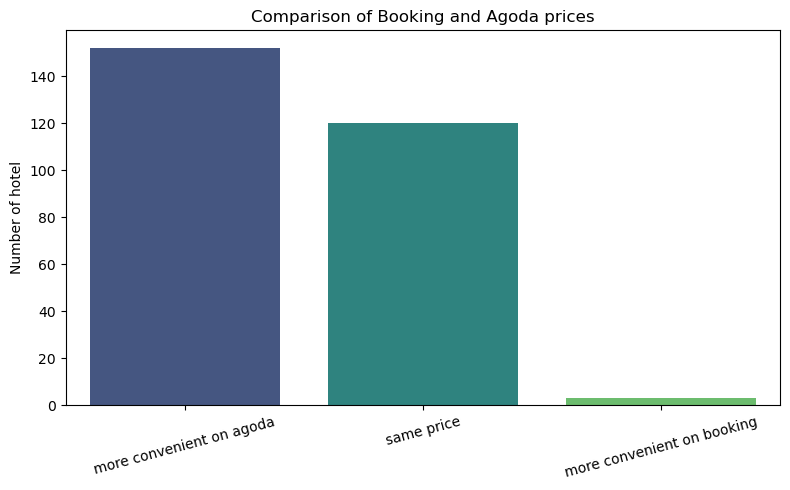

In [10]:
# Conta quante volte ciascuna etichetta appare
conteggio_convenienza = df['convenienza'].value_counts().reset_index()
conteggio_convenienza.columns = ['Portale più conveniente', 'Numero di hotel']

# Grafico
plt.figure(figsize=(8, 5))
sns.barplot(data=conteggio_convenienza, x='Portale più conveniente', y='Numero di hotel', palette='viridis')
plt.title('Comparison of Booking and Agoda prices')
plt.ylabel('Number of hotel')
plt.xlabel('')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [11]:
# Calculate the mean of the 'differenza_percentuale' column
media_differenza_percentuale = df['differenza_percentuale'].mean()

# Print the result
print(f"La media della variabile 'differenza_percentuale' è: {media_differenza_percentuale}")


La media della variabile 'differenza_percentuale' è: 13.920644905725904


In [12]:
# Differenza
df['differenza'] = df['prezzo_booking'] - df['prezzo_agoda']
df['differenza_assoluta'] = df['differenza'].abs()

# Booking più caro
piu_caro_booking = df[df['differenza'] > 0]
# Agoda più caro
piu_caro_agoda = df[df['differenza'] < 0]

# Esempi
print("\nEsempi dove Booking è più caro:")
display(piu_caro_booking[['titolo_booking', 'prezzo_booking', 'prezzo_agoda', 'differenza']].head())

print("\nEsempi dove Agoda è più caro:")
display(piu_caro_agoda[['titolo_booking', 'prezzo_booking', 'prezzo_agoda', 'differenza']].head())



Esempi dove Booking è più caro:


,titolo_booking,prezzo_booking,prezzo_agoda,differenza
0,Sonder by Marriott Bonvoy Piazza Venezia Apart...,322,228,94
5,Bhr Cavour 150,170,122,48
7,Hotel Relais Dei Papi,264,226,38
9,Profumo Maison Colosseo,194,163,31
10,Hotel Abitart,205,156,49



Esempi dove Agoda è più caro:


,titolo_booking,prezzo_booking,prezzo_agoda,differenza
20,The Spanish Suite Campo de' Fiori,255,316,-61
113,Corso Suite 107 Rooms Wellness & Spa,240,270,-30
281,"Favolosa ""Dimora del Capriolo"" con Giardino e ...",216,228,-12


In [13]:
# Media delle differenze
media_diff = df['differenza'].mean()
media_diff_assoluta = df['differenza'].abs().mean()

print(f"\nIn media Booking è più caro di {media_diff:.2f} euro (positivo significa Booking più caro).")
print(f"In media la differenza assoluta è di {media_diff_assoluta:.2f} euro.")



df['percentuale_diff'] = (df['differenza'] / df['prezzo_booking']) * 100
media_percentuale_diff = df['percentuale_diff'].mean()
media_percentuale_diff_assoluta = df['percentuale_diff'].abs().mean()
print(f"In media Agoda è più conveniente del {abs(media_percentuale_diff):.2f}% rispetto a Booking (segno positivo = Booking più caro).")
print(f"In media la differenza percentuale assoluta è del {media_percentuale_diff_assoluta:.2f}%.")



In media Booking è più caro di 22.45 euro (positivo significa Booking più caro).
In media la differenza assoluta è di 23.20 euro.
In media Agoda è più conveniente del 10.10% rispetto a Booking (segno positivo = Booking più caro).
In media la differenza percentuale assoluta è del 10.41%.


In [14]:
# Supponiamo che matches_df_2_new sia già caricato
# matches_df_2_new = pd.read_csv("tuo_file.csv")

# Calcola la differenza di prezzo per ciascun record
df["differenza_prezzo"] = df["prezzo_agoda"] - df["prezzo_booking"]

# Calcola la media della differenza
media_differenza = df["differenza_prezzo"].mean()

# Calcola la percentuale media di differenza rispetto al prezzo booking
df["percentuale_differenza"] = df["differenza_prezzo"] / df["prezzo_booking"] * 100

# Media della percentuale
media_percentuale = df["percentuale_differenza"].mean()

print(f"La differenza media di prezzo è {media_differenza:.2f} euro.")
print(f"La differenza media percentuale è {media_percentuale:.2f}%.")


# Raggruppa per città e calcola la media dei prezzi su Agoda e Booking
prezzi_medi = df.groupby('città_agoda')[['prezzo_agoda', 'prezzo_booking']].mean()

display(prezzi_medi)


La differenza media di prezzo è -22.45 euro.
La differenza media percentuale è -10.10%.


,prezzo_agoda,prezzo_booking
città_agoda,,
roma,194.483412,223.663507
terni,99.046875,99.328125


# individua outliers

In [15]:
def trova_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # restituisce un booleano: True se è outlier
    return (series < lower_bound) | (series > upper_bound)



In [16]:
# Trova outlier su entrambe le colonne
outlier_agoda = trova_outlier_iqr(df['prezzo_agoda'])
outlier_booking = trova_outlier_iqr(df['prezzo_booking'])

# Tutti gli outlier (su almeno una delle due colonne)
outliers = outlier_agoda | outlier_booking

print(f"Numero totale outlier: {outliers.sum()}")

# Mostra gli outlier
display(df[outliers])

Numero totale outlier: 15


,pair,name_similarity,titolo_booking,titolo_agoda,zona_booking,zona_agoda,città_booking,città_agoda,prezzo_booking,prezzo_agoda,...,numero_persone,inizio_permanenza,fine_permanenza,differenza_assoluta,differenza_percentuale,convenienza,differenza,percentuale_diff,differenza_prezzo,percentuale_differenza
3,27#487,1.0,Terrace Pantheon Relais,Terrace Pantheon Relais,Pantheon,Pantheon,roma,roma,366,366,...,2.0,01-08-25,02-08-25,0,0.000000,same price,0,0.000000,0,0.000000
23,140#419,1.0,LUDUS ROOMS,Ludus Rooms,Rione Monti,Colosseo e Foro Romano,roma,roma,414,412,...,2.0,01-08-25,02-08-25,2,0.485437,more convenient on agoda,2,0.483092,-2,-0.483092
43,222#155,1.0,Hotel Villa Glori,Hotel Villa Glori,Villa Borghese/Parioli,Flaminio e Parioli,roma,roma,802,752,...,2.0,01-08-25,02-08-25,50,6.648936,more convenient on agoda,50,6.234414,-50,-6.234414
44,227#415,1.0,Hotel Viminale,Viminale Hotel,Rione Monti,Monti,roma,roma,386,367,...,2.0,01-08-25,02-08-25,19,5.177112,more convenient on agoda,19,4.922280,-19,-4.922280
66,301#521,1.0,Atlante Star Hotel,Atlante Star Hotel,Vaticano Prati,Città del Vaticano,roma,roma,410,345,...,2.0,01-08-25,02-08-25,65,18.840580,more convenient on agoda,65,15.853659,-65,-15.853659
82,363#523,1.0,Hotel Locarno,Hotel Locarno,Spagna,Piazza di Spagna,roma,roma,599,500,...,2.0,01-08-25,02-08-25,99,19.800000,more convenient on agoda,99,16.527546,-99,-16.527546
89,381#416,1.0,Residenza Paolo VI,Residenza Paolo VI,Vaticano Prati,Città del Vaticano,roma,roma,502,427,...,2.0,01-08-25,02-08-25,75,17.564403,more convenient on agoda,75,14.940239,-75,-14.940239
117,481#275,1.0,Hotel Barberini,Hotel Barberini,Trevi,Fontana di Trevi,roma,roma,364,359,...,2.0,01-08-25,02-08-25,5,1.392758,more convenient on agoda,5,1.373626,-5,-1.373626
121,492#132,1.0,Domus 21 Luxury Suites,Domus 21 Luxury Suites,Pantheon,Pantheon,roma,roma,421,338,...,2.0,01-08-25,02-08-25,83,24.556213,more convenient on agoda,83,19.714964,-83,-19.714964
135,540#421,1.0,Hotel Barocco,Hotel Barocco,Via Veneto,Via Veneto,roma,roma,349,349,...,2.0,01-08-25,02-08-25,0,0.000000,same price,0,0.000000,0,0.000000


In [17]:
# Dataframe senza outlier
df_senza_outlier = df[~outliers]

# Calcolo prezzi medi senza outlier
prezzi_medi_no_outlier = df_senza_outlier.groupby('città_agoda')[['prezzo_agoda', 'prezzo_booking']].mean()

display(prezzi_medi_no_outlier)


,prezzo_agoda,prezzo_booking
città_agoda,,
roma,172.255102,200.433673
terni,99.046875,99.328125
